<a href="https://colab.research.google.com/github/Anis5221/PR-AI-with-Python-core/blob/main/K_Means_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
dataset = pd.read_csv('iris.csv')
X = dataset.iloc[:, [2,3]].values

In [11]:
dataset.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


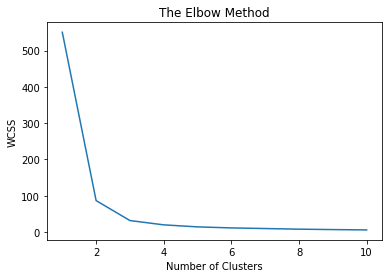

In [16]:
from sklearn.cluster import KMeans
    # import KMeans class from psychic learn
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

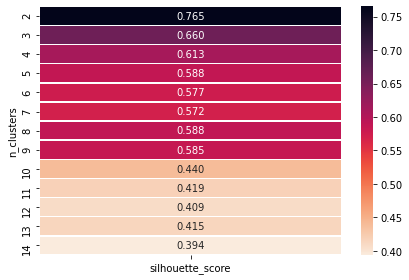

In [17]:
# Silhouette value Method to find the value of ‘k’.
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sns 
clusters_range = range (2,15)
results = []
for i in clusters_range:
  cluster = KMeans(n_clusters=i, init='k-means++', random_state=42)
  cluster_labels= cluster.fit_predict(X)
  silhouette_avg =  silhouette_score(X, cluster_labels)
  results.append([i, silhouette_avg])
result =  pd.DataFrame(results, columns=['n_clusters','silhouette_score'])
pivot = pd.pivot_table(result,index='n_clusters', values='silhouette_score')
plt.figure()
sns.heatmap(pivot, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

In [22]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, random_state = 0)
y_kmeans = kmeans.fit_predict(X)


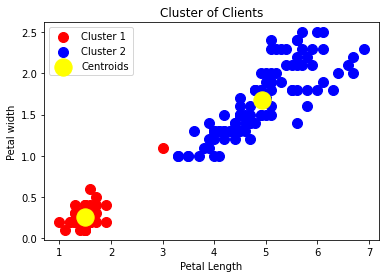

In [26]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')
    # cluster centroids
plt.title('Cluster of Clients')
plt.xlabel('Petal Length')
plt.ylabel('Petal width')
plt.legend()
plt.show()

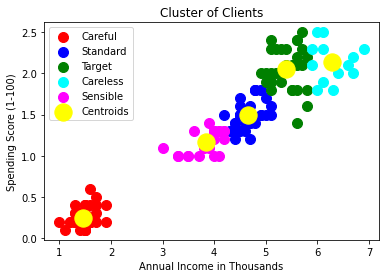

In [20]:

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Cluster of Clients')
plt.xlabel('Annual Income in Thousands')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [21]:
print(kmeans.predict([[140,20]]))

[3]
